<strong><b><font size="5">Web Scraping e Análise de Dados</font></b></strong>

<strong><b><font size="5">Laboratório 3</font></b></strong>

<strong><b><font size="4">Data Science no Esporte - Web Scraping e Análise Estatística em Dados da NBA</font></b></strong>

## Definição do Problema

A Ciência de Dados está em todos os lugares. Se há dados disponíveis, podemos extrair, analisar e gerar insights poderosos. E no esporte não seria diferente.

Cada vez mais gestores de todos os esportes descobrem os benefícios e vantagem competitiva em usar análise de dados para compreender o comportamento dos atletas, melhorar o desempenho, unir atletas com características complementares no mesmo time e muito mais.

Neste Lab, vamos extrair dados reais de atletas da NBA - a Liga de Basquete Norte Americana - e analisar os dados.

## Fonte de Dados

Nossa fonte de dados será o site <a href="https://www.basketball-reference.com">Bastketball Reference</a> que mantém todos os detalhes e estatísticas sobre a NBA.

## Carregando os Pacotes Usados Neste Jupyter Notebook

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão Python:', python_version())

Versão Python: 3.7.3


In [ ]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [ ]:
# Pacote Pingouin
# Pacote para analise estatisticas
!pip install -q -U pingouin

In [218]:
# Imports

# Imports para Web Scraping
import bs4
import csv 
import requests 
from bs4 import BeautifulSoup

# Imports para manipulação, visualização e análise de dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import numpy as np

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

pingouin 0.3.6
pandas   1.0.4
bs4      4.7.1
requests 2.21.0
csv      1.0
seaborn  0.10.1



## Web Scraping

In [5]:
# Etapa 1: Carregar os dados direto do website.
website = requests.get("https://www.basketball-reference.com/leagues/NBA_2020_per_game.html")

In [8]:
# Validando a conexao com a url {200} = OK
website.status_code

200

In [10]:
# Visualizando todo o documento extraído do website
website.text

'\n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/bbr/build" itemscope itemtype="https://schema.org/WebSite" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://d2p3bygnnzw9w3.cloudfront.net/req/202007011" />\n\n<!-- no:cookie fast load the css.           -->\n<script>function gup(n) {n = n.replace(/[\\[]/, \'\\\\[\').replace(/[\\]]/, \'\\\\]\'); var r = new RegExp(\'[\\\\?&]\'+n+\'=([^&#]*)\'); var re = r.exec(location.search);   return re === null?\'\':decodeURIComponent(re[1].replace(/\\+/g,\' \'));}; document.srdev = gup(\'srdev\')</script>\n<link rel="preconnect" href="https://d2p3bygnnzw9w3.cloudfront.net" crossorigin>\n\n <style>html,body{margin:0;padding:0;font:14px/1.25 "Helvetica Neue",helvetica,arial,sans-serif;color:#000}body{position:relative;backgrou

In [11]:
# Obtendo o Código HTML da Página através da biblioteca BeatufilSoap
website_html = BeautifulSoup(website.text, 'html.parser')

In [289]:
#website_html

A partir da inspeção realizada na página web, os dados que queremos extrair se encontra dentro de um TAG DIV, class do tipo "overthrow table_container". 

In [290]:
dados_extraidos = website_html.find("div", {"class": "overthrow table_container"})
#dados_extraidos

In [16]:
# A partir dos dados extraidos, queremos obter o cabeçalho da tabela. Cabeçalho esse que contém os nomes das colunas.
# Esses dados se encontram na TAG THEAD
header = dados_extraidos.find("thead")
header_elements = header.find_all("th")
# Para cada registro na lista, extraía somente os texto, que é onde está o nome das colunas. [1:] para ignorar a coluna Rk
header_elements = [head.text for head in header_elements[1:]]

In [80]:
# Salvando todo o resultado da extração em uma lista
full_data = []
full_data.append(header_elements)
full_data

[['Player',
  'Pos',
  'Age',
  'Tm',
  'G',
  'GS',
  'MP',
  'FG',
  'FGA',
  'FG%',
  '3P',
  '3PA',
  '3P%',
  '2P',
  '2PA',
  '2P%',
  'eFG%',
  'FT',
  'FTA',
  'FT%',
  'ORB',
  'DRB',
  'TRB',
  'AST',
  'STL',
  'BLK',
  'TOV',
  'PF',
  'PTS']]

In [27]:
# Obtendo as informações contidas nos dados extraídos.
Line_elements = dados_extraidos.find_all("tr", {"class": "full_table"})

In [291]:
# Extrai somente as informações da tag td e obtem o texto.  No fim, adiciona o resultado dentro de uma lista.
full_elements = []
for row in Line_elements:
    data_elements = row.find_all("td")
    data_elements = [data.text for data in data_elements]
    full_elements.append(data_elements)

In [81]:
# Transforma as 2 listas em dataframe
df = pd.DataFrame(full_data + full_elements)
# Renomeia o cabeçalho para os registros da posição 0
df = df.rename(columns=df.iloc[0])
# Remove a linha de posição 0
df = df.drop(df.index[0])

In [86]:
# Salva os dados obtidos em um arquivo CSV
df.to_csv('dados/scraping_nba.csv', index=False, header=True)

## Carregando e Analisando os Dados

In [87]:
# Carrega o arquivo csv com o conteúdo do web scraping
df_nba = pd.read_csv('dados/scraping_nba.csv')

In [88]:
# Shape
df_nba.shape

(514, 29)

In [89]:
# Visualiza uma amostra dos dados
df_nba.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,58,58,27.0,4.5,7.6,0.591,...,0.590,3.4,6.0,9.4,2.4,0.9,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,65,65,34.4,6.3,11.1,0.567,...,0.690,2.5,8.0,10.5,5.1,1.2,1.3,2.8,2.5,16.2
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Nickeil Alexander-Walker,SG,21,NOP,41,0,12.2,1.9,5.5,0.339,...,0.607,0.2,1.8,2.0,1.8,0.3,0.2,1.0,1.1,5.1
4,Grayson Allen,SG,24,MEM,30,0,16.6,2.6,5.9,0.449,...,0.857,0.2,2.0,2.2,1.4,0.2,0.0,0.8,1.2,7.4
5,Jarrett Allen,C,21,BRK,64,58,25.7,4.2,6.5,0.646,...,0.620,3.0,6.4,9.5,1.3,0.6,1.3,1.1,2.3,10.6
6,Kadeem Allen,SG,27,NYK,10,0,11.7,1.9,4.4,0.432,...,0.636,0.2,0.7,0.9,2.1,0.5,0.2,0.8,0.7,5.0
7,Al-Farouq Aminu,PF,29,ORL,18,2,21.1,1.4,4.8,0.291,...,0.655,1.3,3.5,4.8,1.2,1.0,0.4,0.9,1.5,4.3
8,Justin Anderson,SF,26,BRK,3,0,5.7,0.3,2.0,0.167,...,0.500,0.0,0.7,0.7,0.0,0.0,0.3,0.0,0.7,1.0
9,Kyle Anderson,PF,26,MEM,59,20,19.3,2.3,4.7,0.493,...,0.652,0.9,3.4,4.4,2.2,0.8,0.5,0.9,1.4,5.7


**Dicionário de Dados** (conforme mostrado na fonte de dados):

- Rk -- Rank
- Pos -- Position
- Age -- Player's age on February 1 of the season
- Tm -- Team
- G -- Games
- GS -- Games Started
- MP -- Minutes Played Per Game
- FG -- Field Goals Per Game
- FGA -- Field Goal Attempts Per Game
- FG% -- Field Goal Percentage
- 3P -- 3-Point Field Goals Per Game
- 3PA -- 3-Point Field Goal Attempts Per Game
- 3P% -- 3-Point Field Goal Percentage
- 2P -- 2-Point Field Goals Per Game
- 2PA -- 2-Point Field Goal Attempts Per Game
- 2P% -- 2-Point Field Goal Percentage
- eFG% -- Effective Field Goal Percentage

This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.

- FT -- Free Throws Per Game
- FTA -- Free Throw Attempts Per Game
- FT% -- Free Throw Percentage
- ORB -- Offensive Rebounds Per Game
- DRB -- Defensive Rebounds Per Game
- TRB -- Total Rebounds Per Game
- AST -- Assists Per Game
- STL -- Steals Per Game
- BLK -- Blocks Per Game
- TOV -- Turnovers Per Game
- PF -- Personal Fouls Per Game
- PTS -- Points Per Game

### Qual a idade média dos jogadores que disputaram a temporada 2019/2020 da NBA?

In [98]:
df_nba['Age'].mean()

25.470817120622566

A idade média foi de 25 anos na temporadada 2019/2020. Vamos criar um histograma e um boxplot e analisar a distribuição da variável idade.

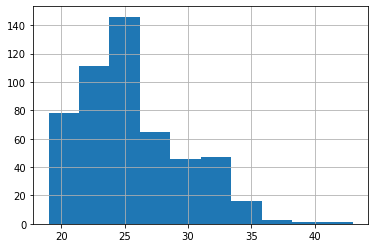

In [99]:
df_nba['Age'].hist()

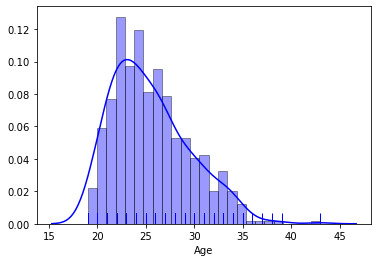

In [113]:
# hist = Plota a distribuição do histograma
# kde = plota a linha de densidade estimada
# rug = plota um gráfico de linhas ao pé do eixo de suporte
# hist_kwd = cor da divisão das linhas no histograma
ax = sns.distplot(df_nba['Age'], hist = True, kde = True, rug = False, color = 'blue', bins = 25, hist_kws = {'edgecolor':'black'})
plt.show()

É possível notar que temos alguns outliers (Valores mais afastados da média no gráfico, vamos confirmar isso com o boxplot). Será que a variável idade segue uma distribuição normal? Olhando através do gráfico visual podemos tirar conclusões precipitadas. Vamos conferir.

In [114]:
# Teste de normalidade com Pingouin
# Valor alpha default: 0.05
pg.normality(df_nba['Age'])

,W,pval,normal
Age,0.949461,3.012423e-12,False


Baseado no teste de normalidade com Pingouin, os dados da variável Age não seguem uma distribuição normal.

- Movito: o pvalue é < 0.05.

### Quais são os jogadores com maior número de pontos por jogo? Selecione os Top 10.
Coluna PTS do Dataframe

In [126]:
# reset_index é utilizado para que a coluna Player não seja categorizada como INDEX do resultado.
df_nba_pts = df_nba.groupby(['Player'])['PTS'].sum().reset_index()
df_nba_pts

,Player,PTS
0,Aaron Gordon,14.4
1,Aaron Holiday,9.4
2,Abdel Nader,6.0
3,Adam Mokoka,2.9
4,Admiral Schofield,3.1
...,...,...
509,Zach LaVine,25.5
510,Zach Norvell,2.0
511,Zhaire Smith,1.1
512,Zion Williamson,23.6


In [127]:
# Retorna o TOP 10 maiores registros na coluna PTS
df_nba_pts.nlargest(10, 'PTS')

,Player,PTS
213,James Harden,34.4
40,Bradley Beal,30.5
173,Giannis Antetokounmpo,29.6
474,Trae Young,29.6
87,Damian Lillard,28.9
321,Luka Dončić,28.7
425,Russell Westbrook,27.5
309,Kyrie Irving,27.4
279,Kawhi Leonard,26.9
22,Anthony Davis,26.7


### Quantos jogos os jogadores com 35 anos de idade ou mais iniciaram jogando a partida (variável GS)?

In [148]:
df_nba_35Age = df_nba[(df_nba['Age'] >= 35) & (df_nba['GS'] > 0)]
df_nba_35Age[['Player','Age']]

,Player,Age
14,Carmelo Anthony,35
24,J.J. Barea,35
90,Tyson Chandler,37
164,Marc Gasol,35
243,LeBron James,35
407,J.J. Redick,35


### Gráfico que mostra a relação entre rebotes ofensivos (ORB) e minutos jogados (MP). 
O que podemos concluir a partir do gráfico?

Será utilizado um gráfico de dispersão junto com uma linha de regressão do relacionamento entre Rebotes Ofensivos e Minutos Jogados

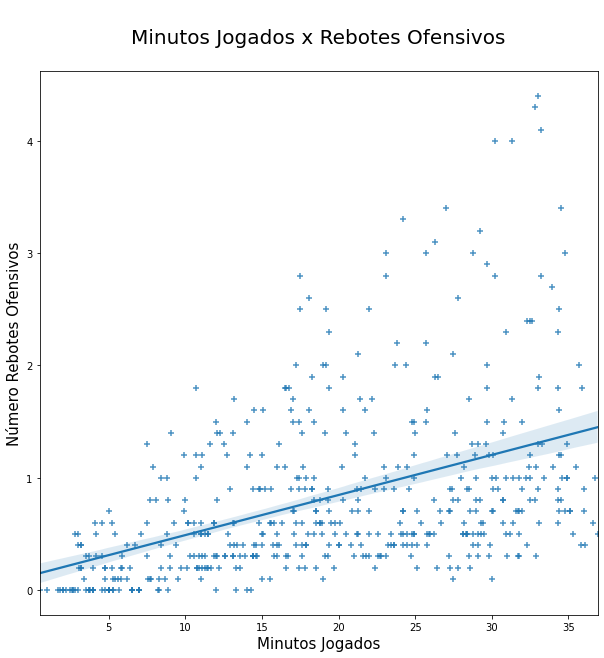

In [167]:
plt.figure(figsize=[10,10])
plt.title('\nMinutos Jogados x Rebotes Ofensivos\n', fontsize = 20)
ax = sns.regplot(x = df_nba['MP'], y = df_nba['ORB'], marker = '+')
ax.set_xlabel('Minutos Jogados', fontsize=15)
ax.set_ylabel('Número Rebotes Ofensivos', fontsize=15);

Aumenta a dispersão dos dados à media que aumenta o número de minutos jogados. Ou seja, com os jogadores mais cansados ao final do jogo é mais difícil fazer rebotes ofensivos.

O número de rebote não aumenta de acordo com o tempo que o jogador passa em quadra.

Caso tivessemos uma reta linear crescente aguda e a maioria dos dados começassem a ser representados com alto número de rebotes ao final dos jogos, a conclusão seria que os jogadores conseguem mais rebotes ofensivos ao final de cada jogo.

### Gráfico que mostra a relação entre rebotes defensivos e minutos jogados. 

O que podemos concluir a partir do gráfico?

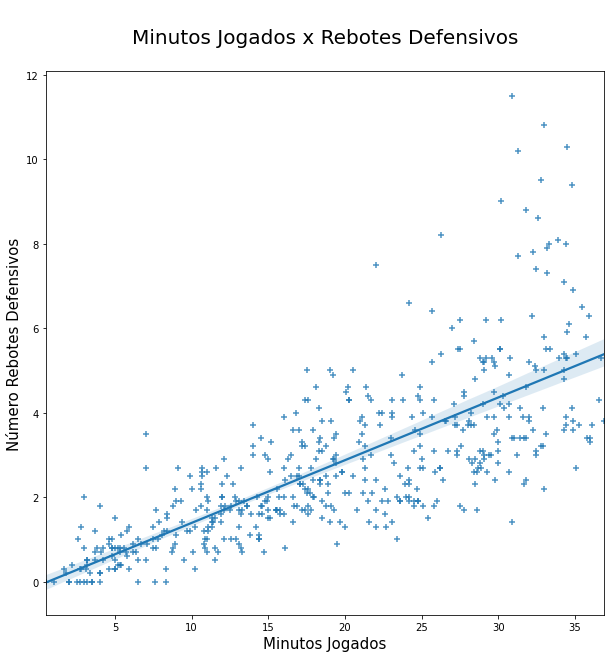

In [288]:
plt.figure(figsize=[10,10])
plt.title('\nMinutos Jogados x Rebotes Defensivos\n', fontsize = 20)
ax = sns.regplot(x = df_nba['MP'], y = df_nba['DRB'], marker = '+')
ax.set_xlabel('Minutos Jogados', fontsize=15)
ax.set_ylabel('Número Rebotes Defensivos', fontsize=15);

O comportamento dos rebotes desensivos segue um padrão diferente dos rebotes ofensivos. Mais ao final do jogo, as equipes itensificam suas defesas e consequentemente aumenta o número de rebotes defensivos.

--------------------------------------------------------------------------------------------------------------------------
### Aplicando uma previsão de números de rebotes ofensivos em determinado tempo do jogo baseado nos dados que foram feitos o scraping.

##### Os dados extraídos corresponde ao resumo da temporada e possui apenas 1 linha de cada player. Devido a essa caracteristica se torna inviável realizar o treinamento do modelo considerando o player.

In [234]:
# Obtendo somente os dados de tempo jogado e rebote ofensivo 
df_preditcion = df_nba[['MP', 'ORB']]
df_preditcion

,MP,ORB
0,27.0,3.4
1,34.4,2.5
2,33.1,1.9
3,12.2,0.2
4,16.6,0.2
...,...,...
509,24.9,1.5
510,35.3,0.5
511,23.1,2.8
512,10.0,0.8


In [235]:
# Importação dos pocates para dividir os dados em treino e teste, pacote do modelo de regressão e o pacote para avaliar o resultado.
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [236]:
df_preditcion.shape

(514, 2)

In [239]:
(df_preditcion['MP'].values).shape

(514,)

In [250]:
# Necessário aplicar a conversão utilizando o reshape para que as informações sejam representadas com 2 dimensões (linhaxcoluna)
x = df_preditcion['MP'].values.reshape(-1, 1)
target = df_preditcion['ORB'].values

In [251]:
x.shape

(514, 1)

In [252]:
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size=0.3)

In [253]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [260]:
y_pred = regressor.predict(x_test)

In [256]:
# flatten() : retorna os dados em uma única dimensão (semelhante ao ravel)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,1.2,0.500929
1,0.4,0.972156
2,0.8,0.474540
3,1.7,0.595174
4,0.2,0.753507
...,...,...
150,0.4,0.210653
151,0.4,0.828903
152,0.7,0.738427
153,0.3,0.693190


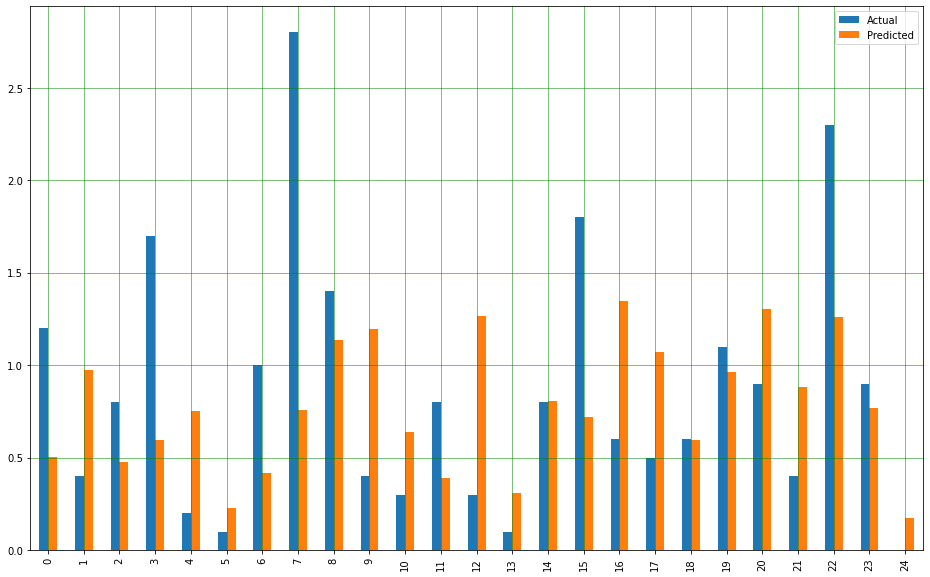

In [257]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [258]:
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4869350952644852
Mean Squared Error: 0.3970493418935693
Root Mean Squared Error: 0.6301185141650492


##### Resultado do modelo preditivo:

O modelo de previsão não obteve bons resultados.

Motivos:

- Temos poucos dados para realizar o treinamento;
- Foi considerado apenas 1 variável preditora;

#### IMPROVEMENT :
Para uma análise mais precisa e melhor elaborada, a abordagem será a seguinte:

- Realizar o levantamento individual de cada player em cada jogo e analisar o tempo jogado x rebotes ofensivos.

Com essa análise será possível realizar a previsão individual de cada jogador baseado em suas pontuações anteriores.
